In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
data = pd.read_csv('output_results.csv', sep=';')
# data = data[data['cpu_count']<=16]
#tempo base é a media do tempo de execucao com 1 nucleo só
tempo_base = data[data['cpu_count']==1].groupby('cpu_count')['time'].mean().values[0]
data['speedup'] = 1/(data['time']/tempo_base)


In [4]:
data_static = data[data['scheduling']=='static']
static_average_time_per_cpu_count = data_static.groupby('cpu_count')['speedup'].mean()

data_dynamic = data[data['scheduling']=='dynamic']
dynamic_average_time_per_cpu_count = data_dynamic.groupby('cpu_count')['speedup'].mean()

data_guided = data[data['scheduling']=='guided']
guided_average_time_per_cpu_count = data_guided.groupby('cpu_count')['speedup'].mean()

data_auto = data[data['scheduling']=='auto']
auto_average_time_per_cpu_count = data_auto.groupby('cpu_count')['speedup'].mean()

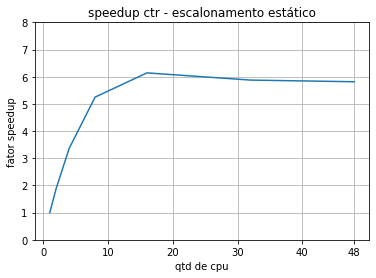

In [12]:
plt.plot(static_average_time_per_cpu_count.index, static_average_time_per_cpu_count.values)
plt.xlabel('qtd de cpu')
plt.ylabel('fator speedup')
plt.title('speedup ctr - escalonamento estático')
plt.grid(True)
x_intervals = np.array([ 0, 10, 20, 30, 40, 48]) 
y_intervals = np.arange(0, 9, 1) 
plt.xticks(x_intervals)
plt.yticks(y_intervals)
plt.show()

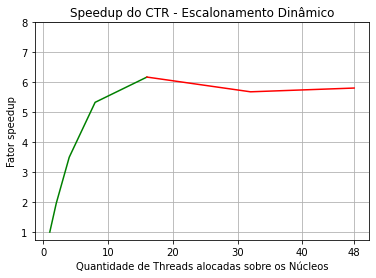

In [25]:
ate_16 = dynamic_average_time_per_cpu_count[[1,2,4,8,16]]
de_16_ate_48 = dynamic_average_time_per_cpu_count[[16,32,48]]
plt.plot(ate_16.index, ate_16.values, color='green')
plt.plot(de_16_ate_48.index, de_16_ate_48.values, color='red')
plt.xlabel('Quantidade de Threads alocadas sobre os Núcleos')
plt.ylabel('Fator speedup')
plt.title('Speedup do CTR - Escalonamento Dinâmico')
plt.grid(True)
x_intervals = np.array([ 0, 10, 20, 30, 40, 48]) 
y_intervals = np.arange(1, 9, 1) 
plt.xticks(x_intervals)
plt.yticks(y_intervals)
plt.show()

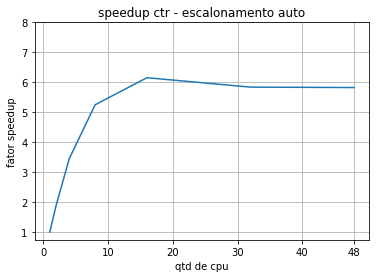

In [15]:
plt.plot(auto_average_time_per_cpu_count.index, auto_average_time_per_cpu_count.values)
plt.xlabel('qtd de cpu')
plt.ylabel('fator speedup')
plt.title('speedup ctr - escalonamento auto')
plt.grid(True)
x_intervals = np.array([ 0, 10, 20, 30, 40, 48]) 
y_intervals = np.arange(1, 9, 1) 
plt.xticks(x_intervals)
plt.yticks(y_intervals)
plt.show()

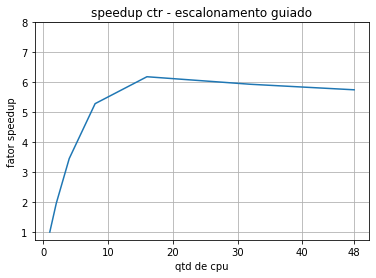

In [16]:

plt.plot(guided_average_time_per_cpu_count.index, guided_average_time_per_cpu_count.values)
plt.xlabel('qtd de cpu')
plt.ylabel('fator speedup')
plt.title('speedup ctr - escalonamento guiado')
plt.grid(True)
x_intervals = np.array([ 0, 10, 20, 30, 40, 48]) 
y_intervals = np.arange(1, 9, 1) 
plt.xticks(x_intervals)
plt.yticks(y_intervals)
plt.show()

In [14]:
auto_average_time_per_cpu_count
# guided_average_time_per_cpu_count

cpu_count
1     0.998893
2     1.905617
4     3.446949
8     5.249085
16    6.152430
Name: speedup, dtype: float64

In [10]:
auto_average_time_per_cpu_count.values

array([0.99889264, 1.90561719, 3.44694944, 5.24908531, 6.15243035])